<a href="https://colab.research.google.com/github/Bahrombekk/pytorch/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22cards_image_classification_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget  o- cards.zip  https://www.dropbox.com/scl/fi/b5gqxii1zxu9rwigd0m8q/Karta.zip?rlkey=z0si08aefmqap4bg9yaevyd2u&dl=0

--2023-07-17 14:45:27--  http://o-/
Resolving o- (o-)... failed: Name or service not known.
wget: unable to resolve host address ‘o-’
--2023-07-17 14:45:27--  http://cards.zip/
Resolving cards.zip (cards.zip)... failed: No address associated with hostname.
wget: unable to resolve host address ‘cards.zip’
--2023-07-17 14:45:27--  https://www.dropbox.com/scl/fi/b5gqxii1zxu9rwigd0m8q/Karta.zip?rlkey=z0si08aefmqap4bg9yaevyd2u
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/e/scl/fi/b5gqxii1zxu9rwigd0m8q/Karta.zip?rlkey=z0si08aefmqap4bg9yaevyd2u [following]
--2023-07-17 14:45:28--  https://www.dropbox.com/e/scl/fi/b5gqxii1zxu9rwigd0m8q/Karta.zip?rlkey=z0si08aefmqap4bg9yaevyd2u
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: 

In [9]:
!unzip   cards.zip

unzip:  cannot find or open cards.zip, cards.zip.zip or cards.zip.ZIP.


In [10]:
import torch
import pathlib
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.models import alexnet
from torch.utils.data import Dataset,DataLoader

In [11]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# **data preporessing**

In [12]:
train_path = pathlib.Path('/content/train')
test_path = pathlib.Path('/content/test')

In [13]:
transform = T.Compose([
    T.Resize((224,224)),
    T.ToTensor()
])

In [ ]:
class Cards(Dataset):

  def __init__(self, path, transform):
    self.data = list(path.glob('*/*.jpg'))
    self.transform = transform

  def __getitem__(self, index):
    image = Image.open(self.data[index])
    image = self.transform(image)

    label_data = {
                  'ace of clubs':0, 'ace of diamonds':1, 'ace of hearts':2, 'ace of spades':3,
                  'eight of clubs':4, 'eight of diamonds':5, 'eight of hearts':6, 'eight of spades':7,
                  'five of clubs':8, 'five of diamonds':9, 'five of hearts':10, 'five of spades':11,
                  'four of clubs':12, 'four of diamonds':13, 'four of hearts':14, 'four of spades':15,
                  'jack of clubs':16, 'jack of diamonds':17, 'jack of hearts':18, 'jack of spades':19,
                  'joker':20,
                  'king of clubs':21, 'king of diamonds':22,  'king of hearts':23, 'king of spades':24,
                  'nine of clubs':25, 'nine of diamonds':26,  'nine of hearts':27,  'nine of spades':28,
                  'queen of clubs':29, 'queen of diamonds':30, 'queen of hearts':31, 'queen of spades':32,
                  'seven of clubs':33, 'seven of diamonds':34, 'seven of hearts':35, 'seven of spades':36,
                  'six of clubs':37, 'six of diamonds':38, 'six of hearts':39, 'six of spades':40,
                  'ten of clubs':41, 'ten of diamonds':42, 'ten of hearts':43, 'ten of spades':44,
                  'three of clubs':45, 'three of diamonds':46, 'three of hearts':47, 'three of spades':48,
                  'two of clubs':49, 'two of diamonds':50, 'two of hearts':51, 'two of spades':52,

                  }

    label = label_data.get((self.data[index]).parts[-2])
    return image, label

  def __len__(self):
    return len(self.data)

In [ ]:
train_data = Cards(train_path, transform)
test_data = Cards(test_path, transform)

In [ ]:
trainloader = DataLoader(train_data, batch_size=96,shuffle=True)
testloader = DataLoader(test_data, batch_size=96,shuffle=True)
fortest = DataLoader(test_data, batch_size=len(test_data),shuffle=True)

# **model**

In [ ]:
model = alexnet()

In [ ]:
model.fc =  torch.nn.Linear(in_features=2048,out_features=53)

In [ ]:
model = model.to(device)

In [ ]:
model.parameters

<bound method Module.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=92

# **train**

In [ ]:
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
num_epochs = 5

In [ ]:
class Trainer:
    def __init__(self, model, train_dataloader, test_dataloader, criterion, optimizer, epochs=3):
        self.model = model
        self.train_dataloader = train_dataloader
        self.test_dataloader = test_dataloader
        self.criterion = criterion
        self.optimizer = optimizer

        self.epochs = epochs
        self.history = {'loss':[],'acc':[],'val_loss':[],'val_acc':[]}

    def train_loop(self):
        sum_loss = 0
        sum_accuracy = 0
        n = len(self.train_dataloader)
        for i, (data,label) in enumerate(tqdm(self.train_dataloader)):
            data = data.to(device)
            label = label.to(device)
            # prediction model
            output = self.model(data)
            # find loss
            loss = self.criterion(output, label)

            sum_loss += loss.item()
            n_corrects = (output.argmax(axis=1)==label).sum().item()
            sum_accuracy += n_corrects/label.size(0)

            loss.backward()
            self.optimizer.step()
            self.optimizer.zero_grad()


        train_loss = sum_loss/n
        train_accuracy = sum_accuracy/n

        self.history['loss'].append(train_loss)
        self.history['acc'].append(train_accuracy)

        return train_loss, train_accuracy

    def validation_loop(self):
        sum_loss = 0
        sum_accuracy = 0
        n = len(self.test_dataloader)
        for i, (data,label) in enumerate(tqdm(self.test_dataloader)):
            data = data.to(device)
            label = label.to(device)
            # prediction model
            output = self.model(data)
            # find loss
            loss = self.criterion(output, label)
            n_corrects = (output.argmax(axis=1)==label).sum().item()

            sum_loss += loss.item()
            sum_accuracy += n_corrects/label.size(0)

        val_loss = sum_loss/n
        val_accuracy = sum_accuracy/n

        self.history['val_loss'].append(val_loss)
        self.history['val_acc'].append(val_accuracy)

        return val_loss, val_accuracy

    def train(self):
        for epoch in range(num_epochs):
            train_loss, train_acc = self.train_loop()
            val_loss, val_acc = self.validation_loop()
            print()
            print(f'Epoch[{epoch+1}/{num_epochs}] \t train_loss: {train_loss:.5f}, train_acc: {train_acc:.2f} \t val_loss: {val_loss:.5f} \t val_acc: {val_acc:.2}')

In [ ]:
trainer = Trainer(
    model = model,
    train_dataloader = trainloader,
    test_dataloader = testloader,
    criterion=criterion,
    optimizer=optimizer
)

In [ ]:
trainer.train()

100%|██████████| 3/3 [00:00<00:00,  4.55it/s]



Epoch[1/5] 	 train_loss: 6.28410, train_acc: 0.02 	 val_loss: 3.99300 	 val_acc: 0.018


100%|██████████| 3/3 [00:00<00:00,  4.51it/s]



Epoch[2/5] 	 train_loss: 3.82575, train_acc: 0.04 	 val_loss: 3.72170 	 val_acc: 0.044


100%|██████████| 3/3 [00:00<00:00,  4.55it/s]



Epoch[3/5] 	 train_loss: 3.67004, train_acc: 0.04 	 val_loss: 3.62708 	 val_acc: 0.03


100%|██████████| 3/3 [00:00<00:00,  4.61it/s]



Epoch[4/5] 	 train_loss: 3.44064, train_acc: 0.07 	 val_loss: 3.18861 	 val_acc: 0.11


100%|██████████| 3/3 [00:00<00:00,  4.69it/s]


Epoch[5/5] 	 train_loss: 2.73631, train_acc: 0.19 	 val_loss: 2.40271 	 val_acc: 0.24


In [ ]:
img, label = next(iter(fortest))
pred = model(img.to(device))
pred = pred.argmax(axis=1)
pred = pred.detach().cpu()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(label, pred)

<Axes: >

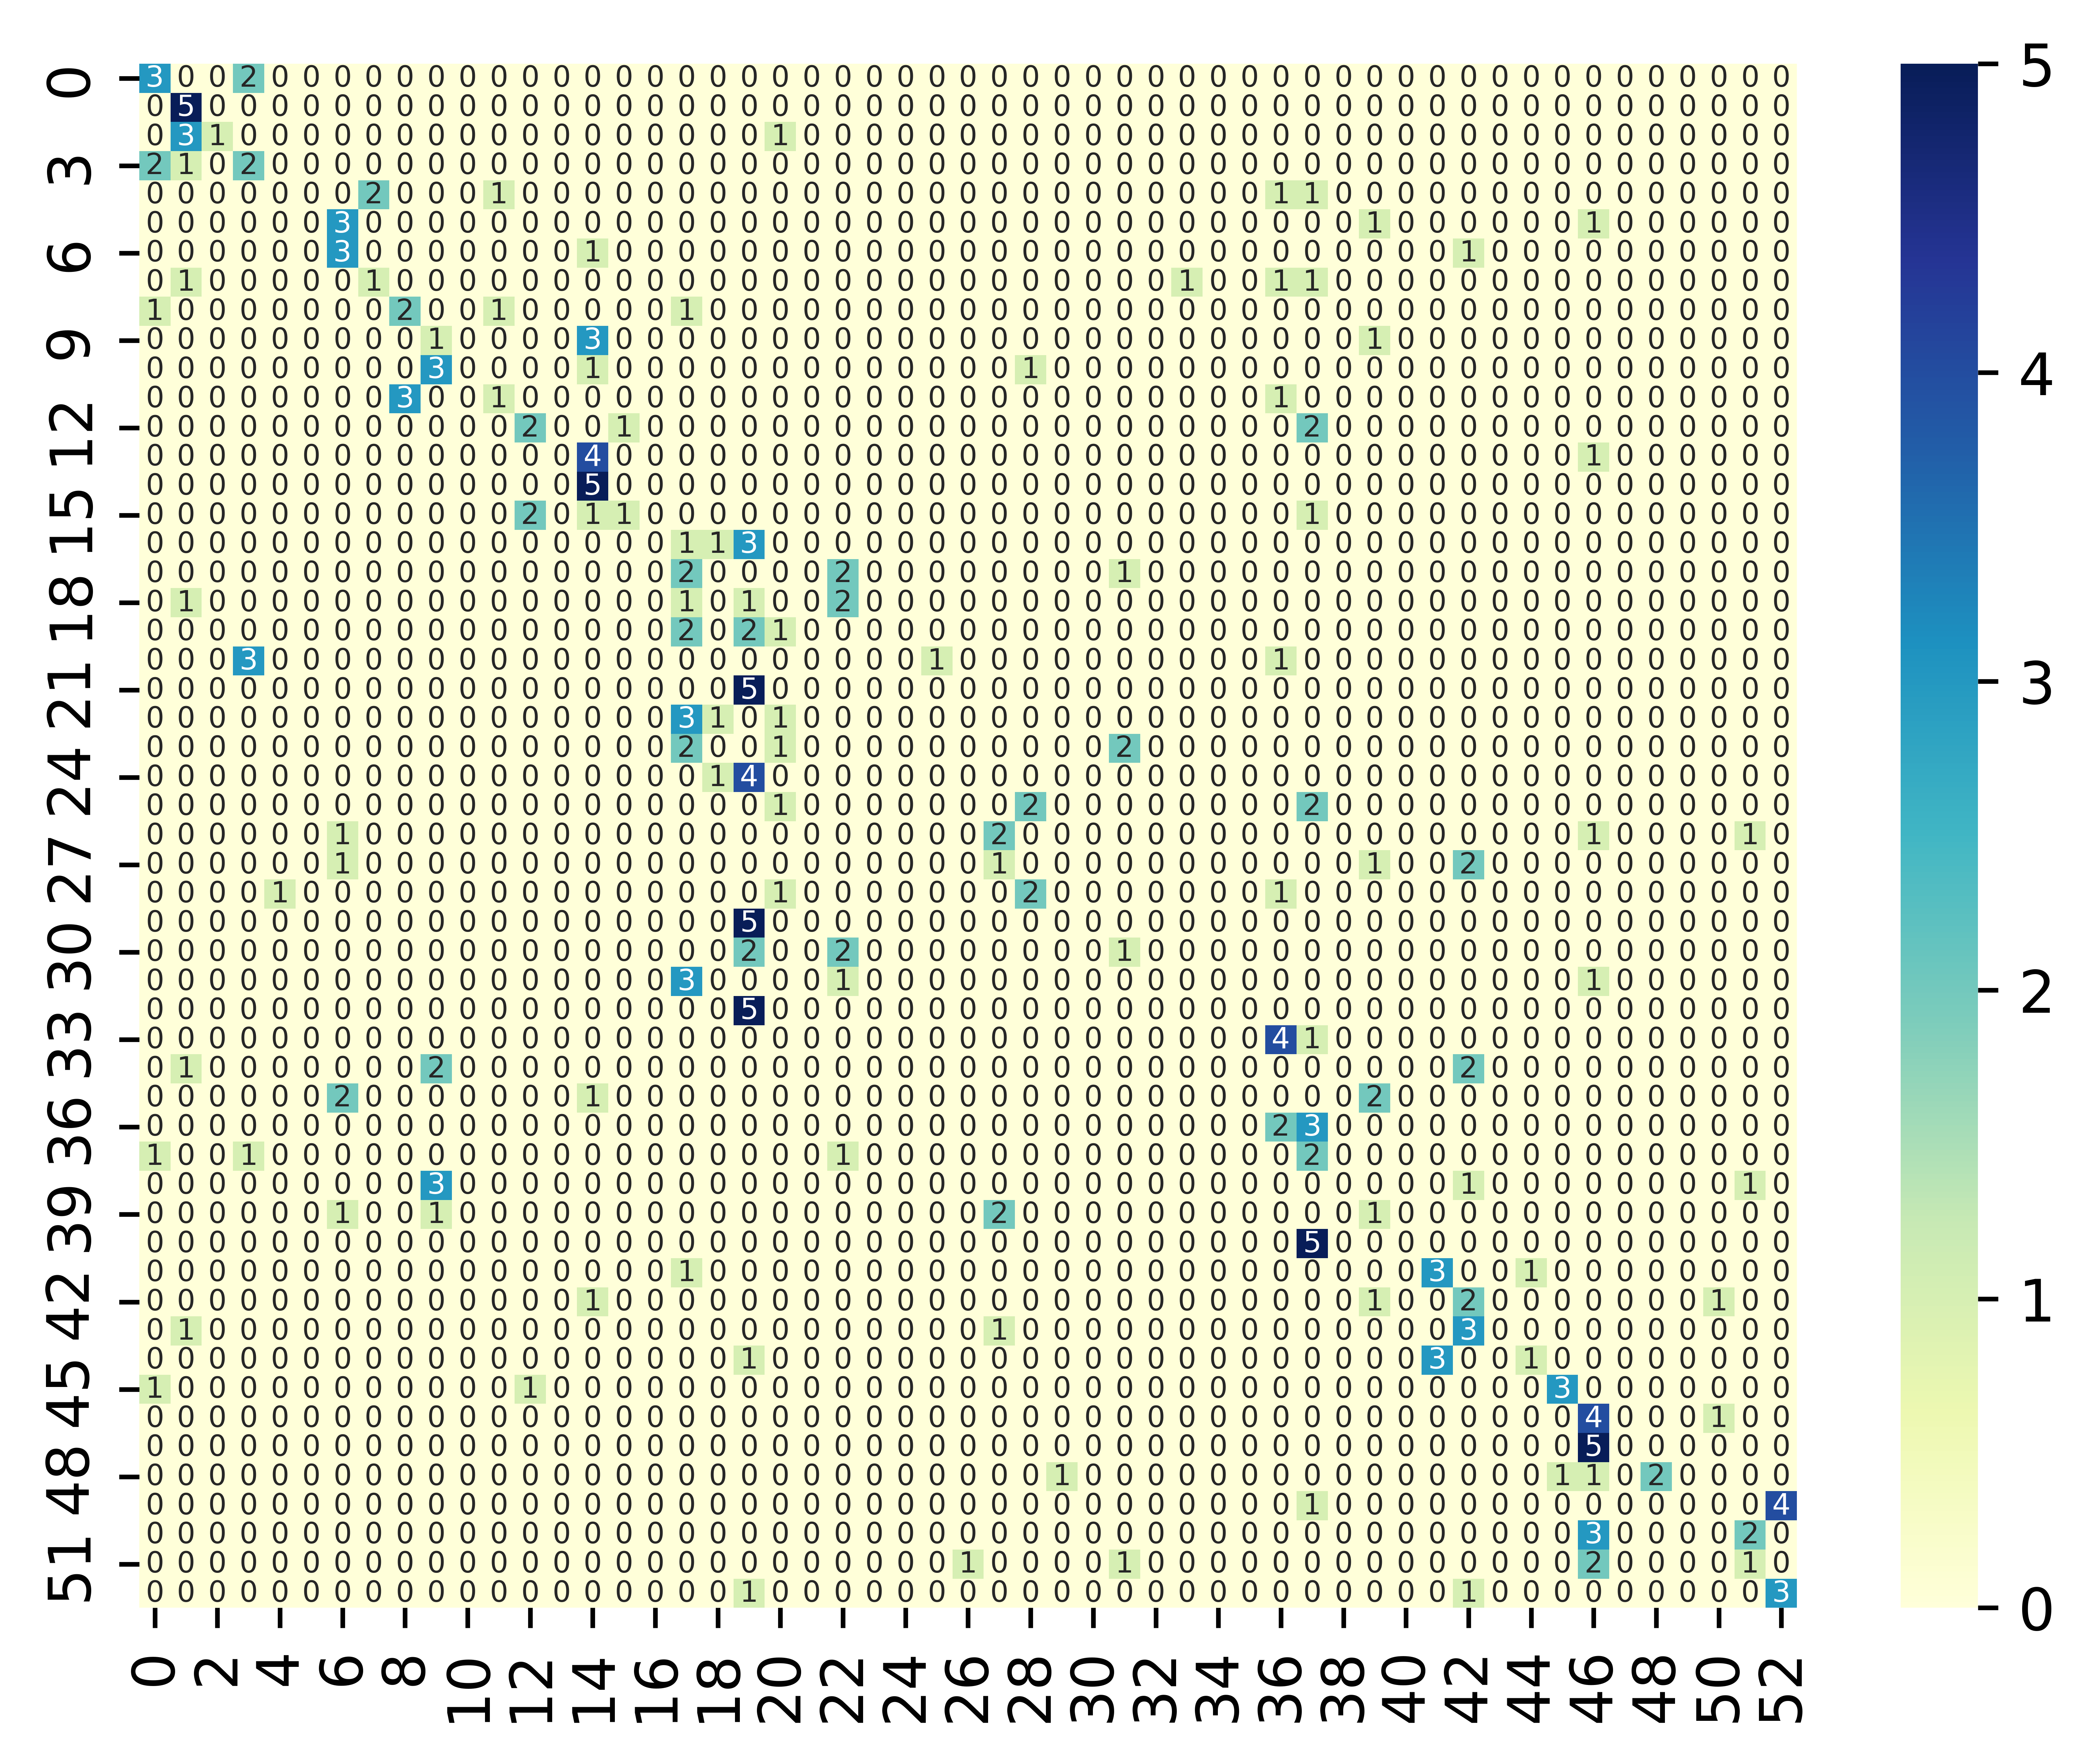

In [ ]:
import seaborn as sns
figure = plt.figure(dpi=1200)
sns.heatmap(cm, annot=True, cmap = 'YlGnBu', annot_kws={"size":5})